In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import Counter
from IPython.display import clear_output
import seaborn as sns

## Importing
[to top](#Table-of-Contents) 

In [7]:
pwd

u'/Users/innovation-sfi/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [8]:
df = pk.load(open('pickles_and_munged_csv/pre1950_cated_cumed_codes_as_ints_v1.pk', 'rb')); df

appln_auth,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,IE,IS,IT,JP,LU,NL,NO,SE,SU,US
pub_year,,,,,,,,,,,,,,,,,,,,,
1836,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1513, 1789], [1268, 1855], [1762, 1821], [24..."
1837,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5834, 5836], [4907, 5440], [799, 5648], [602..."
1838,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1537, 1774], [1154, 1208], [2724, 2748], [40..."
1839,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4212, 4231], [5078, 6180], [4915, 5001], [33..."
1840,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[2722, 2748], [1862, 1862], [1161, 5985], [48..."
1841,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5986, 6001], [3027, 5586], [2964, 3002], [18..."
1842,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4897, 5004], [5740, 5803], [5349, 5421], [11..."
1843,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1762, 1821], [1762, 1821], [5704, 5807], [57..."
1844,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[3764, 3825], [1520, 1764], [4641, 4643], [11..."


In [9]:
df.drop('SU', axis=1, inplace=True); df

appln_auth,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,GR,IE,IS,IT,JP,LU,NL,NO,SE,US
pub_year,,,,,,,,,,,,,,,,,,,,,
1836,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1513, 1789], [1268, 1855], [1762, 1821], [24..."
1837,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5834, 5836], [4907, 5440], [799, 5648], [602..."
1838,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1537, 1774], [1154, 1208], [2724, 2748], [40..."
1839,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4212, 4231], [5078, 6180], [4915, 5001], [33..."
1840,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[2722, 2748], [1862, 1862], [1161, 5985], [48..."
1841,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5986, 6001], [3027, 5586], [2964, 3002], [18..."
1842,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4897, 5004], [5740, 5803], [5349, 5421], [11..."
1843,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1762, 1821], [1762, 1821], [5704, 5807], [57..."
1844,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[3764, 3825], [1520, 1764], [4641, 4643], [11..."


In [11]:
print df.columns.values

['AT' 'AU' 'BE' 'CA' 'CH' 'DE' 'DK' 'ES' 'FI' 'FR' 'GB' 'GR' 'IE' 'IS' 'IT'
 'JP' 'LU' 'NL' 'NO' 'SE' 'US']


In [ ]:
def map_nan_ls(ls):
    if type(ls) is not list:
        ls = []
    return ls
df = df.applymap(map_nan_ls); df

In [ ]:
c = Counter(a=3, b=1)
d = Counter(a=1, b=2)
print sum((c & d).values())

c = Counter([(1,1),(1,1),(1,1),(1,2)])
print c
d = Counter([(1,1),(1,2),(1,2)])
print d
print sum((c & d).values())

In [ ]:
test_year = 1920
df_test = pd.DataFrame()

for col1 in df:
    print '\n%s' % col1
    g1 = nx.MultiGraph()
    for ls in df.loc[test_year,col1]:
        g1.add_edges_from(combinations(ls, 2))

    for col2 in df:
        print col2,
        g2 = nx.MultiGraph()
        for ls in df.loc[test_year,col2]:
            g2.add_edges_from(combinations(ls, 2))
        if len(g1.edges()) == 0 or len(g2.edges()) == 0:
            df_test.loc[col1,col2] = -1
        else:
            lnk_c1 = Counter(g1.edges())
            lnk_c2 = Counter(g2.edges())
            num_shared_links = sum((lnk_c1 & lnk_c2).values())/float(len(g1.edges()))
            df_test.loc[col1,col2] = num_shared_links

In [ ]:
df_test

In [ ]:
def compute_shared_link_fracs(df, year):
    df_temp = pd.DataFrame()
    for col1 in df:
        print '\n%s' % col1
        g1 = nx.MultiGraph()
        for ls in df.loc[year,col1]:
            g1.add_edges_from(combinations(ls, 2))

        for col2 in df:
            print col2,
            g2 = nx.MultiGraph()
            for ls in df.loc[year,col2]:
                g2.add_edges_from(combinations(ls, 2))
            if len(g1.edges()) == 0 or len(g2.edges()) == 0:
                df_temp.loc[col1,col2] = -1
            else:
                lnk_c1 = Counter(g1.edges())
                lnk_c2 = Counter(g2.edges())
                num_shared_links = sum((lnk_c1 & lnk_c2).values())/float(len(g1.edges()))
                df_temp.loc[col1,col2] = num_shared_links
    return df_temp

In [ ]:
def compute_shared_link_fracs_v2(df, year):
    df_temp = pd.DataFrame()
    for col1 in df:
        print '\n%s' % col1
        if len(df.loc[year,col1]) == 0:
            for col2 in df:
                df_temp.loc[col1,col2] = -1
        else:
            g1 = nx.MultiGraph()
            for ls in df.loc[year,col1]:
                g1.add_edges_from(combinations(ls, 2))

            for col2 in df:
                print col2,
                if len(df.loc[year,col2]) == 0:
                    df_temp.loc[col1,col2] = -1
                else:
                    g2 = nx.MultiGraph()
                    for ls in df.loc[year,col2]:
                        g2.add_edges_from(combinations(ls, 2))
            
                    #lnk_c1 = Counter(g1.edges())
                    #lnk_c2 = Counter(g2.edges())
                    #num _shared_links = sum((lnk_c1 & lnk_c2).values())/float(len(g1.edges()))
                    #df_temp.loc[col1,col2] = num_shared_links
                    df_temp.loc[col1,col2] = (sum(
                                                  (Counter(g1.edges()) &
                                                   Counter(g2.edges())
                                                 ).values())
                                              /float(len(g1.edges())))
    return df_temp

In [ ]:
%time tester1 = compute_shared_link_fracs(df, 1990)

In [ ]:
%time tester2 = compute_shared_link_fracs_v2(df, 1990)

In [ ]:
(tester1 == tester2).sum()

In [ ]:
tester1

In [ ]:
#pk.dump(tester1, open('pickles_and_munged_csv/pre1950_1990_overlaps.pk', 'wb'))

In [ ]:
s_lnk_overlap_fracs = pd.Series()

In [ ]:
decades = range(1900,2020,10)
decades

In [ ]:
 for year in decades:
    print year
    s_lnk_overlap_fracs.loc[year] = compute_shared_link_fracs_v2(df, year)
    clear_output()

In [ ]:
#pk.dump(s_lnk_overlap_fracs, open('pickles_and_munged_csv/pre1950_s_lnk_overlap_fracs_v1.pk', 'wb'))

In [ ]:
s_lnk_overlap_fracs.loc[1910]

In [ ]:
def compute_shared_link_fracs_v3(df, year):
    df_temp = pd.DataFrame()
    for col1 in df:
        print '\n%s' % col1
        if len(df.loc[year,col1]) == 0:
            for col2 in df:
                df_temp.loc[col1,col2] = -1
        else:
            g1 = nx.MultiGraph()
            for ls in df.loc[year,col1]:
                g1.add_edges_from(combinations(ls, 2))

            for col2 in df:
                print col2,
                if len(df.loc[year,col2]) == 0:
                    df_temp.loc[col1,col2] = -1
                else:
                    g2 = nx.MultiGraph()
                    for ls in df.loc[year,col2]:
                        g2.add_edges_from(combinations(ls, 2))
            
                    #lnk_c1 = Counter(g1.edges())
                    #lnk_c2 = Counter(g2.edges())
                    #num _shared_links = sum((lnk_c1 & lnk_c2).values())/float(len(g1.edges()))
                    #df_temp.loc[col1,col2] = num_shared_links
                    df_temp.loc[col1,col2] = ((2 *
                                              sum((Counter(g1.edges()) &
                                                  Counter(g2.edges())
                                                  ).values()))
                                              /(
                                float(len(g1.edges())+
                                      len(g2.edges()))
                                ))
    return df_temp

In [ ]:
test_v3 = compute_shared_link_fracs_v3(df, 2010)

In [ ]:
pk.dump(test_v3, open('pickles_and_munged_csv/pre1950_test_v3_v1.pk', 'wb'))

In [2]:
test_v3 = pk.load(open('pickles_and_munged_csv/pre1950_test_v3_v1.pk', 'rb'))

# Time testing

In [20]:
%%timeit

df_temp = pd.DataFrame()
for col1 in ['AT']:
    %%timeit
    print '\n%s' % col1
    if len(df.loc[2010,col1]) == 0:
        %%timeit
        for col2 in ['US']:
            df_temp.loc[col1,col2] = -1
    else:
        g1 = nx.MultiGraph()
        for ls in df.loc[2010,col1]:
            g1.add_edges_from(combinations(ls, 2))

        for col2 in ['US']:
            print col2,
            if len(df.loc[2010,col2]) == 0:
                df_temp.loc[col1,col2] = -1
            else:
                g2 = nx.MultiGraph()
                for ls in df.loc[2010,col2]:
                    g2.add_edges_from(combinations(ls, 2))

                #lnk_c1 = Counter(g1.edges())
                #lnk_c2 = Counter(g2.edges())
                #num _shared_links = sum((lnk_c1 & lnk_c2).values())/float(len(g1.edges()))
                #df_temp.loc[col1,col2] = num_shared_links
                df_temp.loc[col1,col2] = ((2 *
                                          sum((Counter(g1.edges()) &
                                              Counter(g2.edges())
                                              ).values()))
                                          /(
                            float(len(g1.edges())+
                                  len(g2.edges()))
                            ))
print df_temp


AT
US           US
AT  0.017842


KeyboardInterrupt: 

# Page Rank

In [22]:
%%timeit
g_GB = nx.MultiGraph()
for ls in df.loc[2010,'GB']:
    g1.add_edges_from(combinations(ls, 2))

1 loops, best of 3: 3.39 s per loop


In [30]:
g_GB = nx.MultiGraph()
for ls in df.loc[2010,'GB']:
    g_GB.add_edges_from(combinations(ls, 2))
pr_sp = nx.pagerank_scipy(g_GB)

In [33]:
pr_sp.keys()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 133,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 205,
 206,

# Radius

In [ ]:
rad_year = 2010
s_radius = []
for col in df.loc[2010]:
    g = nx.MultiGraph()
    for ls in df.loc[rad_year,col]:
        g.add_edges_from(combinations(ls, 2))
    

# Plotting

In [ ]:
sns.heatmap(test_v3, vmin=-1, vmax=1)

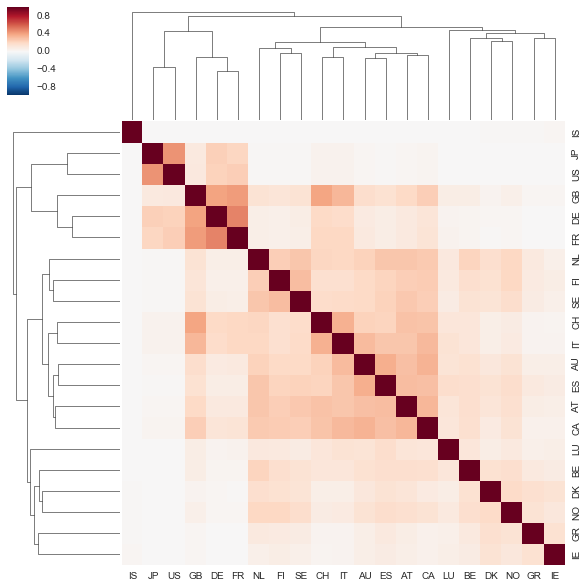

In [4]:
sns.clustermap(test_v3, vmin=-1, vmax=1)


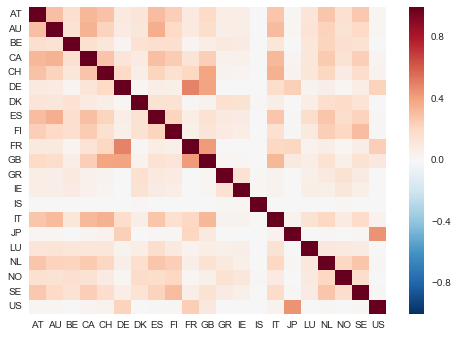

In [3]:
sns.heatmap(test_v3, vmin=-1, vmax=1)
#plt.savefig('heatmat_v2.pdf')